In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm, gamma

In [2]:
# some globals needed for both plots and data extraction
path = "../data-processed/quality/"
_qualities = [240, 360, 480, 720, 1080]
_bitrate = [400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

In [3]:
data = []
for _f in sorted(os.listdir(path), reverse=True):
  if not '-120.d' in _f:
    continue
  with open(path + _f, 'r') as file:
    for s in file.read().split(', '):
      data.append((_f[6:-10], s))
      
data_x = [int(d[0]) for d in data]
data_y = [int(d[1]) for d in data]

## Load and prepare data for heatmaps and 3D plots
TODO: 
* add density option

In [4]:
data_q = {}
for _f in sorted(os.listdir(path), reverse=0):
  if not '-120.d' in _f:
    continue
  with open(path + _f, 'r') as file:
    dd = file.read().split(', ')
    data_q[_f] = [int(el) for el in dd]

data_for_heatmap = np.array([ v for k, v in data_q.items()]); data_for_heatmap.shape
arr = []
for ind, _br in enumerate(data_for_heatmap):
  arr.append([])
  for _q in _qualities:
    arr[ind].append((_br == _q).sum())

data_for_heatmap = np.array(arr)

## Heatmap
TODO: 
* adjust colors
* add colorbar
* switch to density 

/Users/purchasedinukraine/Projects/YouTube-ObjQual-dyploma/virt-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/purchasedinukraine/Projects/YouTube-ObjQual-dyploma/virt-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/Users/purchasedinukraine/Projects/YouTube-ObjQual-dyploma/virt-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


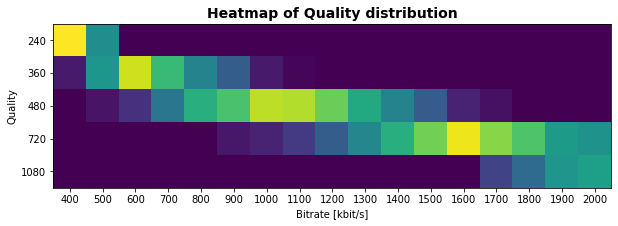

In [5]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
ax.imshow(data_for_heatmap.T)

# Show all ticks and label them with the respective list entries
ax.set_xticklabels(_bitrate)
ax.set_yticklabels(_qualities)
ax.set_xticks(np.arange(len(_bitrate)))
ax.set_yticks(np.arange(len(_qualities)))
ax.set_title("Heatmap of Quality distribution", fontsize=14, fontweight='bold')
ax.set_xlabel('Bitrate [kbit/s]')
ax.set_ylabel('Quality')
fig.show()

## Fit normal or gamma distribution to data

In [6]:
data_for_fitting = []

for id, _q in enumerate(_qualities):
  data_for_fitting.append([])
  for _b in data_q:
    data_for_fitting[id] +=(np.array(data_q[_b]) == _q).sum() * [int(_b[6:-10])]

Extrapolate data for qualities at the edges for 240p and 1080p

In [7]:
data_for_fitting[0] += (np.array(data_for_fitting[0]) == 500).sum() * [300]

In [8]:
fittings = []
for _q in data_for_fitting:
  params = gamma.fit(np.array(_q))
  fittings.append(params)

In [9]:
fittings

[(400044673.3993974, -1407674.8508088896, 0.0035197940385581486),
 (8.77604963376629, 251.61202562625803, 47.8078940056529),
 (240.48569706505714, -2763.6968151472565, 15.955220403055389),
 (315.8396243619791, -2996.6560954922957, 14.520289325851863),
 (248.90924245384804, 262.0073114024817, 6.532500507243427)]

## 2D distributions ploted in 3D

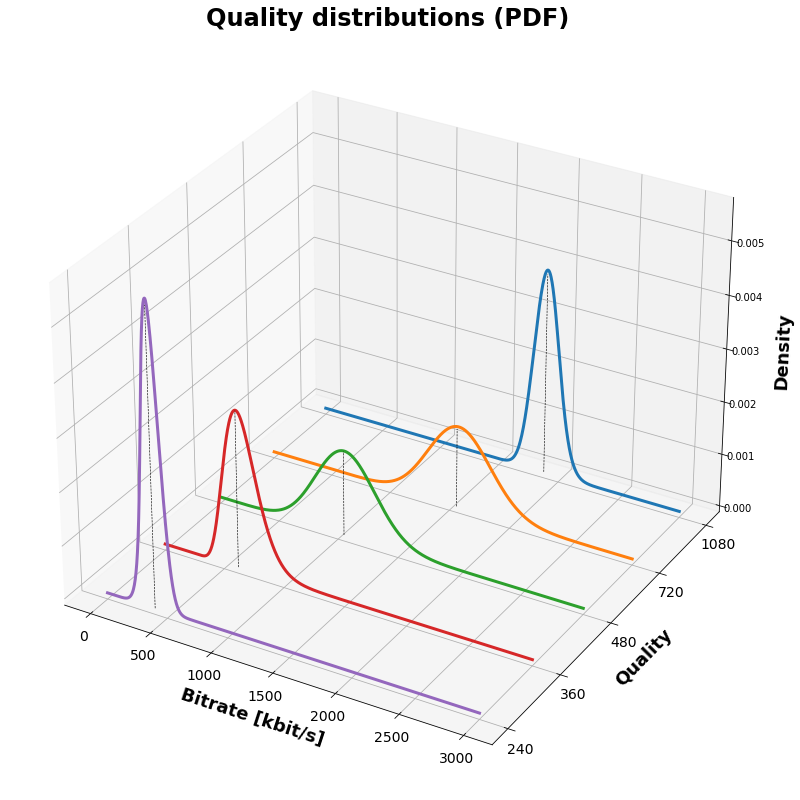

In [97]:
x   = np.linspace(0, len(data_for_heatmap[:, 0])-1 ,len(data_for_heatmap[:, 0]))
pdf_x = np.linspace(0, 3000, 1000)

mean240 = 400
mean360 = 620
mean480 = 1050
mean720 = 1560
mean1080 = 1880

y1  = np.ones(x.size)
y2  = np.ones(x.size)*2
y3  = np.ones(x.size)*3
y4  = np.ones(x.size)*4
y5  = np.ones(x.size)*5
z1 = data_for_heatmap[:, 0]; pdf_z1 = gamma.pdf(pdf_x, *(fittings[0]))
z2 = data_for_heatmap[:, 1]; pdf_z2 = gamma.pdf(pdf_x, *(fittings[1]))
z3 = data_for_heatmap[:, 2]; pdf_z3 = gamma.pdf(pdf_x, *(fittings[2]))
z4 = data_for_heatmap[:, 3]; pdf_z4 = gamma.pdf(pdf_x, *(fittings[3]))
z5 = data_for_heatmap[:, 4]; pdf_z5 = gamma.pdf(pdf_x, *(fittings[4]))

fig = plt.figure(figsize=(14, 14))

ax2 = fig.add_subplot(111, projection='3d')
ax2.plot(pdf_x, np.ones(pdf_x.size)*5, pdf_z5, linewidth=3)
ax2.plot(pdf_x, np.ones(pdf_x.size)*4, pdf_z4, linewidth=3)

ax2.plot(pdf_x, np.ones(pdf_x.size)*3, pdf_z3, linewidth=3)
ax2.plot(pdf_x, np.ones(pdf_x.size)*2, pdf_z2, linewidth=3)
ax2.plot(pdf_x, np.ones(pdf_x.size)*1, pdf_z1, linewidth=3)

#ax2.plot([mean240, mean1080], [1, 5], [0, 0], '--k',  linewidth=0.6)
ax2.plot([mean240, mean240], [1, 1], [0, 0.00555], '--k', linewidth=0.6)
ax2.plot([mean360, mean360], [2, 2], [0, 0.00295], '--k', linewidth=0.6)
ax2.plot([mean480, mean480], [3, 3], [0, 0.0016], '--k', linewidth=0.6)
ax2.plot([mean720, mean720], [4, 4], [0, 0.0015], '--k', linewidth=0.6)
ax2.plot([mean1080, mean1080], [5, 5], [0, 0.0038], '--k', linewidth=0.6)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
  label.set_fontsize(14)

ax2.set_yticks([1, 2, 3, 4, 5])
ax2.set_yticklabels(_qualities)


ax2.set_xlabel('Bitrate [kbit/s]', fontsize=18, labelpad=10, fontweight='bold'), ax2.set_ylabel('Quality', fontsize=18, labelpad=10, fontweight='bold'), ax2.set_zlabel('Density', fontsize=18, labelpad=14, fontweight='bold')
ax2.set_title("Quality distributions (PDF)", fontsize=24, fontweight='bold')
fig.savefig('pdf.png', dpi=500)

Text(0.5, 0.92, 'Quality distributions (PDF)')

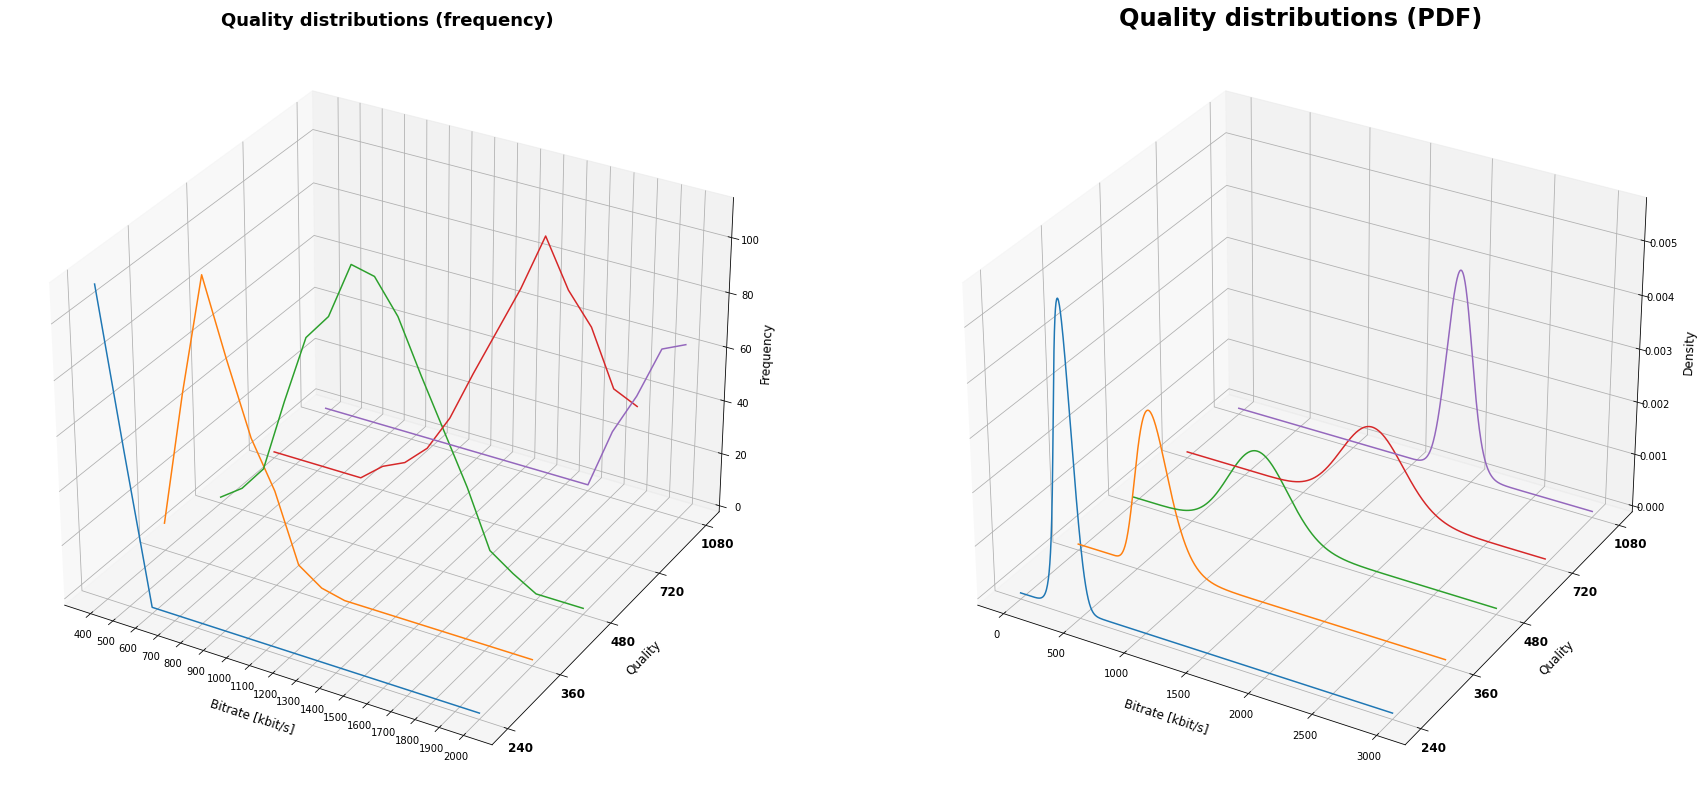

In [45]:
x   = np.linspace(0, len(data_for_heatmap[:, 0])-1 ,len(data_for_heatmap[:, 0]))
pdf_x = np.linspace(0, 3000, 1000)

y1  = np.ones(x.size)
y2  = np.ones(x.size)*2
y3  = np.ones(x.size)*3
y4  = np.ones(x.size)*4
y5  = np.ones(x.size)*5
z1 = data_for_heatmap[:, 0]; pdf_z1 = gamma.pdf(pdf_x, *(fittings[0]))
z2 = data_for_heatmap[:, 1]; pdf_z2 = gamma.pdf(pdf_x, *(fittings[1]))
z3 = data_for_heatmap[:, 2]; pdf_z3 = gamma.pdf(pdf_x, *(fittings[2]))
z4 = data_for_heatmap[:, 3]; pdf_z4 = gamma.pdf(pdf_x, *(fittings[3]))
z5 = data_for_heatmap[:, 4]; pdf_z5 = gamma.pdf(pdf_x, *(fittings[4]))

fig = plt.figure(figsize=(30, 25))
ax = fig.add_subplot(121, projection='3d')
fig.subplots_adjust()
ax.plot(x, y1, z1), ax.plot(x, y2, z2), ax.plot(x, y3, z3), ax.plot(x, y4, z4), ax.plot(x, y5, z5)

ax.set_xticks(x)
ax.set_xticklabels(_bitrate)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(_qualities, fontsize=12, fontweight='bold')

ax.set_xlabel('Bitrate [kbit/s]', fontsize=12, labelpad=10), ax.set_ylabel('Quality', fontsize=12, labelpad=10), ax.set_zlabel('Frequency', fontsize=12)
ax.set_title("Quality distributions (frequency)", fontsize=18, fontweight='bold')

ax2 = fig.add_subplot(122, projection='3d')

ax2.plot(pdf_x, np.ones(pdf_x.size)*1, pdf_z1) 
ax2.plot(pdf_x, np.ones(pdf_x.size)*2, pdf_z2)
ax2.plot(pdf_x, np.ones(pdf_x.size)*3, pdf_z3)
ax2.plot(pdf_x, np.ones(pdf_x.size)*4, pdf_z4)
ax2.plot(pdf_x, np.ones(pdf_x.size)*5, pdf_z5)

ax2.set_yticks([1, 2, 3, 4, 5])
ax2.set_yticklabels(_qualities, fontsize=12, fontweight='bold')


ax2.set_xlabel('Bitrate [kbit/s]', fontsize=12, labelpad=10), ax2.set_ylabel('Quality', fontsize=12, labelpad=10), ax2.set_zlabel('Density', fontsize=12, labelpad=10)
ax2.set_title("Quality distributions (PDF)", fontsize=24, fontweight='bold')

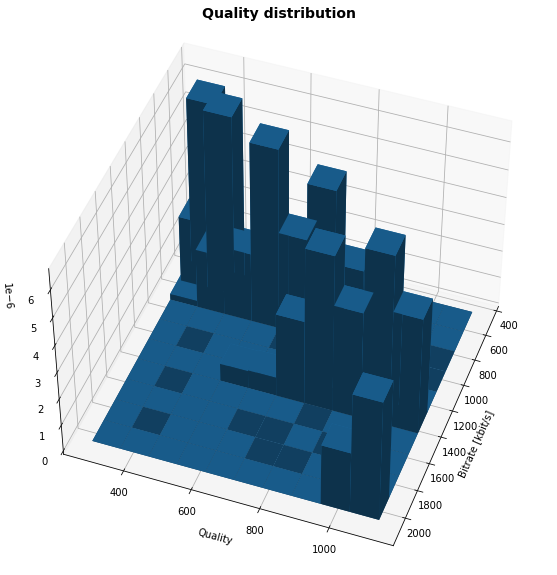

In [46]:

hist, xedges, yedges = np.histogram2d(data_x, data_y, density=True)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like(xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

fig = plt.figure(figsize=(10,10))          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')



ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
plt.xlabel("Bitrate [kbit/s]")
plt.ylabel("Quality")
plt.title("Quality distribution", fontsize=14, fontweight='bold')
ax.view_init(45, 20)
plt.show()